In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
dataset = pd.read_csv('/Users/niteshchandra/Downloads/Online Courses and Resources Files/Projects/MLProject-ChurnPrediction-main/WA_Fn-UseC_-Telco-Customer-Churn.csv')


## Data Preprocessing

In [44]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [47]:
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [48]:
dataset.dropna(inplace=True)

In [49]:
#drop column that are not usefull ie customerID 
dataset.drop(columns= ['customerID'], axis=1, inplace=True)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
for col in dataset:
    print( f" {col}  -->  {dataset[col].unique()} ")

 gender  -->  ['Female' 'Male'] 
 SeniorCitizen  -->  [0 1] 
 Partner  -->  ['Yes' 'No'] 
 Dependents  -->  ['No' 'Yes'] 
 tenure  -->  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 
 PhoneService  -->  ['No' 'Yes'] 
 MultipleLines  -->  ['No phone service' 'No' 'Yes'] 
 InternetService  -->  ['DSL' 'Fiber optic' 'No'] 
 OnlineSecurity  -->  ['No' 'Yes' 'No internet service'] 
 OnlineBackup  -->  ['Yes' 'No' 'No internet service'] 
 DeviceProtection  -->  ['No' 'Yes' 'No internet service'] 
 TechSupport  -->  ['No' 'Yes' 'No internet service'] 
 StreamingTV  -->  ['No' 'Yes' 'No internet service'] 
 StreamingMovies  -->  ['No' 'Yes' 'No internet service'] 
 Contract  -->  ['Month-to-month' 'One year' 'Two year'] 
 PaperlessBilling  -->  ['Yes' 'No'] 
 PaymentMethod  -->  ['Electronic check' 'Mailed check' 'Bank tra

In [51]:
dataset_dum = pd.get_dummies(dataset, drop_first=True)

<Axes: >

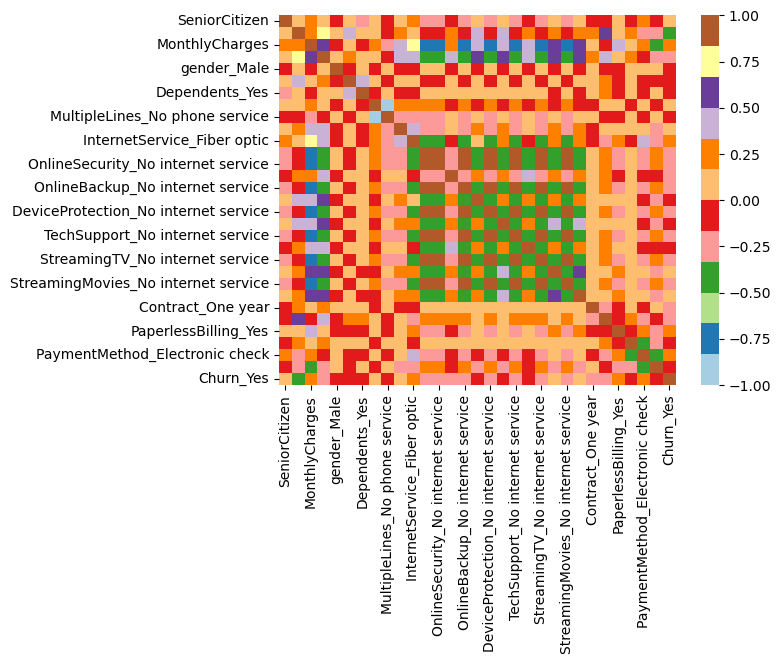

In [52]:
sns.heatmap(dataset_dum.corr(), cmap="Paired")

In [53]:
dataset_dum.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

Removing highly co-related features

In [54]:
dataset_dum.drop(['OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service', 'TechSupport_No internet service','StreamingTV_No internet service', 'StreamingMovies_No internet service'],axis=1,inplace=True
                 )

In [55]:
dataset_dum.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

# Artificial Neural Network

### Importing the libraries

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Splitting the dataset into the Training set and Test set

In [57]:
from sklearn.model_selection import train_test_split
X = dataset_dum.drop('Churn_Yes', axis=1)
y = dataset_dum['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##  Building the ANN

### Initializing the ANN

In [59]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [60]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [61]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [62]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

##  Training the ANN

### Compiling the ANN

In [63]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [64]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
176/176 [==============================] - 0s 409us/step - loss: 0.5777 - accuracy: 0.7095
Epoch 2/100
176/176 [==============================] - 0s 377us/step - loss: 0.4898 - accuracy: 0.7333
Epoch 3/100
176/176 [==============================] - 0s 368us/step - loss: 0.4631 - accuracy: 0.7333
Epoch 4/100
176/176 [==============================] - 0s 370us/step - loss: 0.4504 - accuracy: 0.7335
Epoch 5/100
176/176 [==============================] - 0s 366us/step - loss: 0.4430 - accuracy: 0.7801
Epoch 6/100
176/176 [==============================] - 0s 383us/step - loss: 0.4385 - accuracy: 0.7865
Epoch 7/100
176/176 [==============================] - 0s 376us/step - loss: 0.4352 - accuracy: 0.7918
Epoch 8/100
176/176 [==============================] - 0s 380us/step - loss: 0.4323 - accuracy: 0.7957
Epoch 9/100
176/176 [==============================] - 0s 376us/step - loss: 0.4299 - accuracy: 0.7972
Epoch 10/100
176/176 [==============================] - 0s 377us/step - l

### Evaluating the model

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)


44/44 [==============================] - 0s 302us/step


In [66]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

accuracy_score(y_test, y_pred)

[[936 102]
 [184 185]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.64      0.50      0.56       369

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



0.7967306325515281